In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


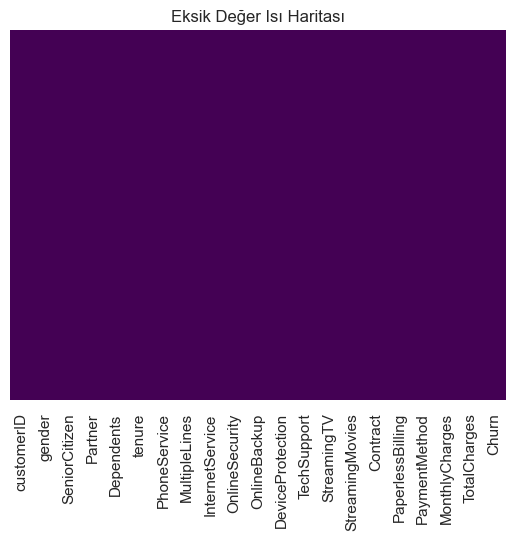

In [45]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Eksik Değer Isı Haritası")
plt.show()

In [15]:
sns.set(style='whitegrid')

In [19]:
print('Churn Orani: ')
print(df['Churn'].value_counts(normalize=True)*100)

Churn Orani: 
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


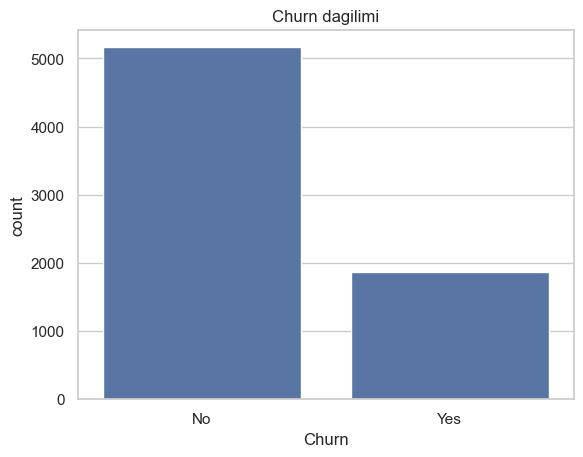

In [21]:
sns.countplot(x='Churn', data=df)
plt.title('Churn dagilimi')
plt.show()

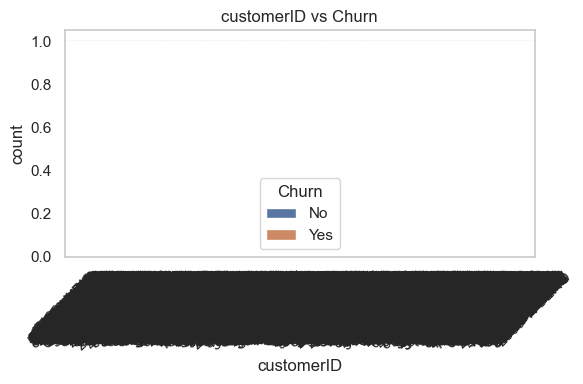

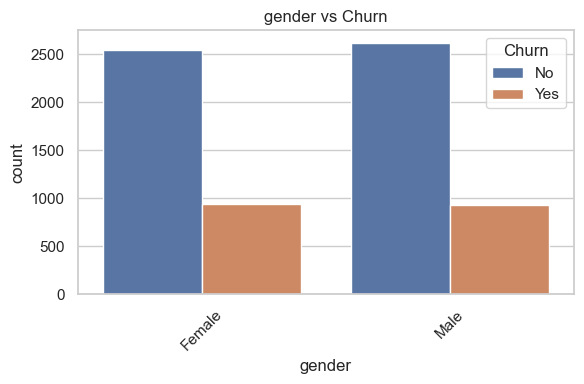

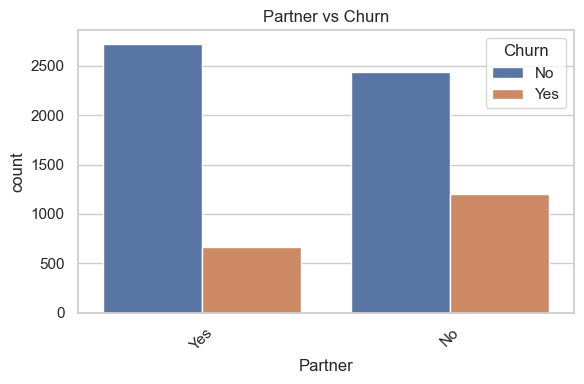

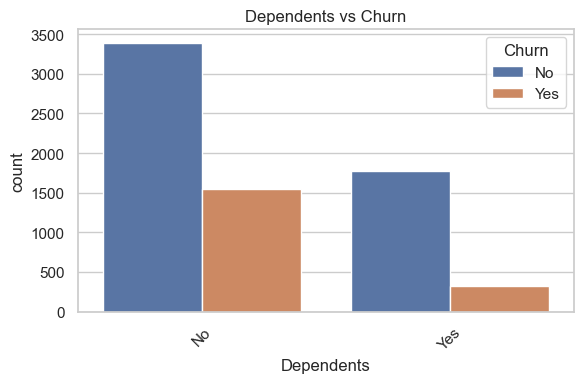

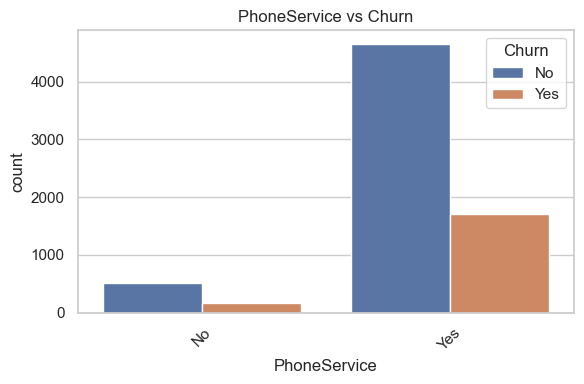

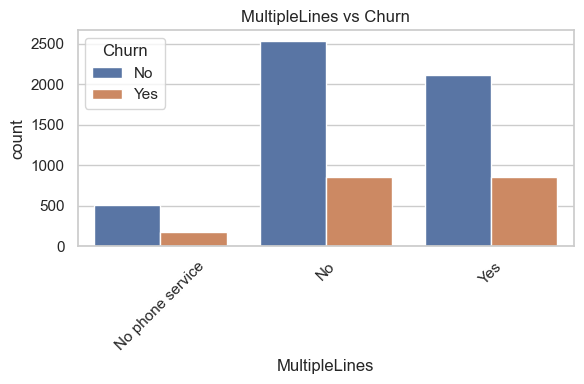

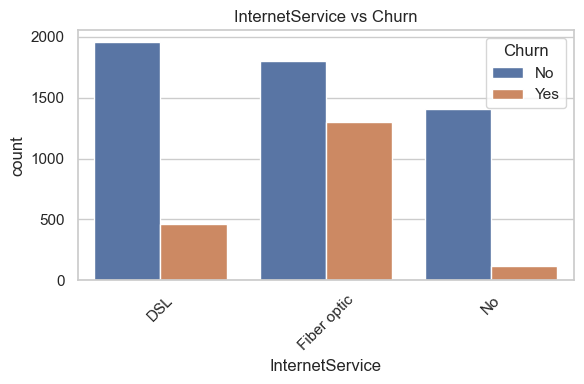

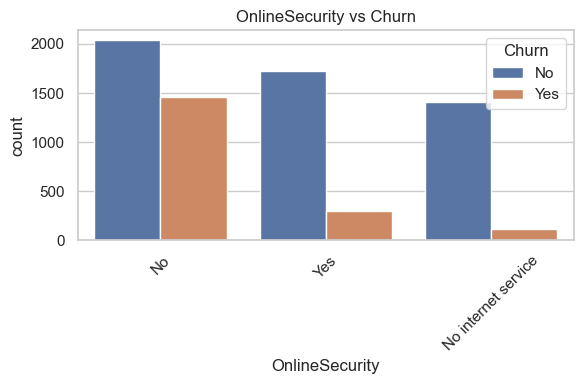

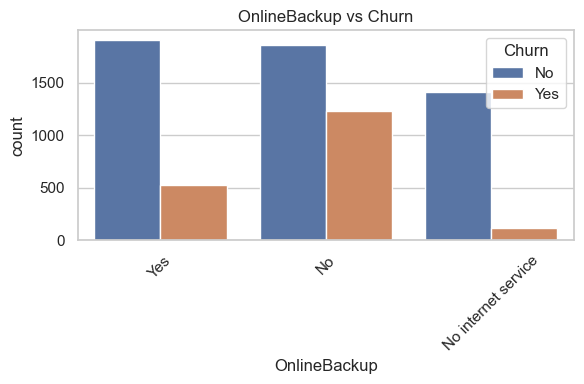

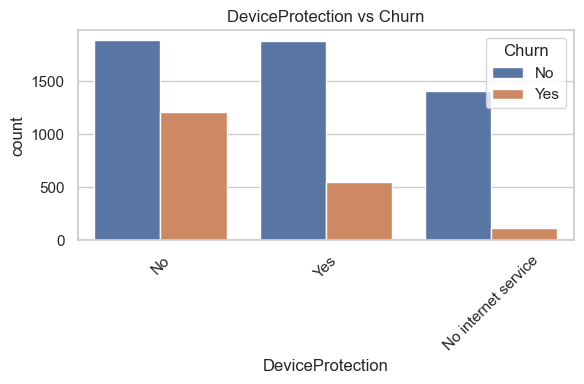

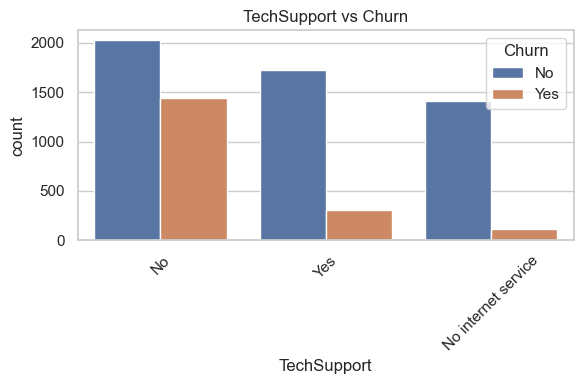

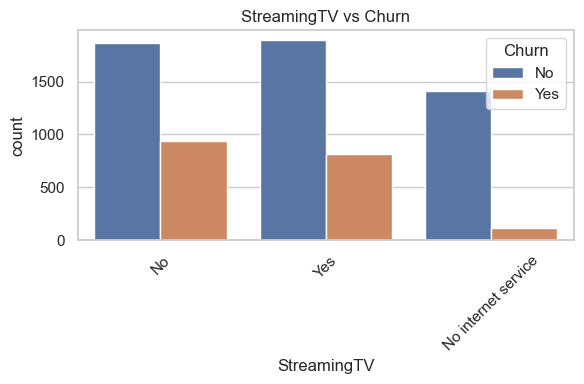

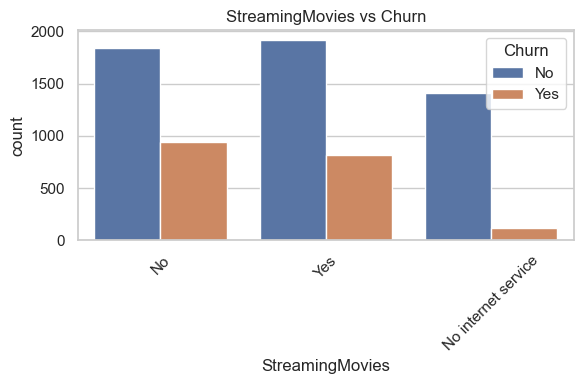

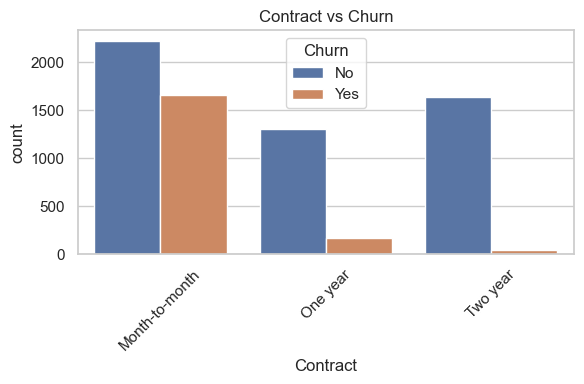

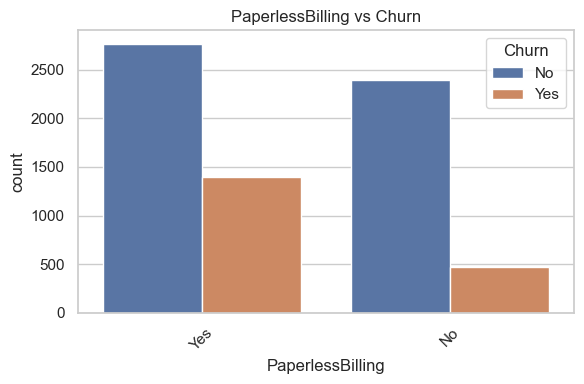

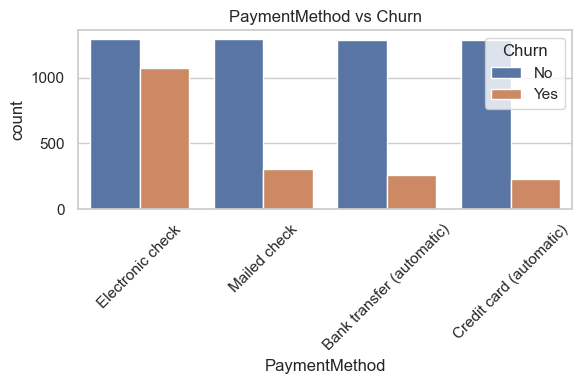

In [23]:
categorical_cols = df.select_dtypes(include='object').columns.drop('Churn')

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

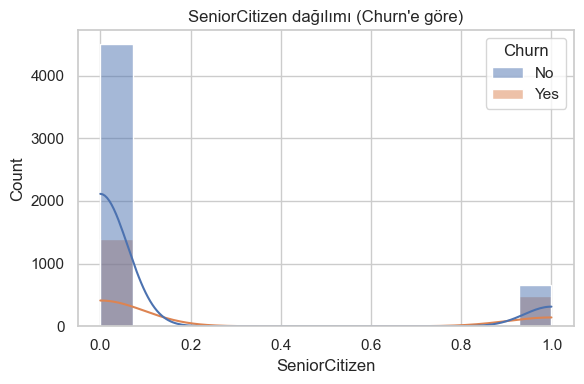

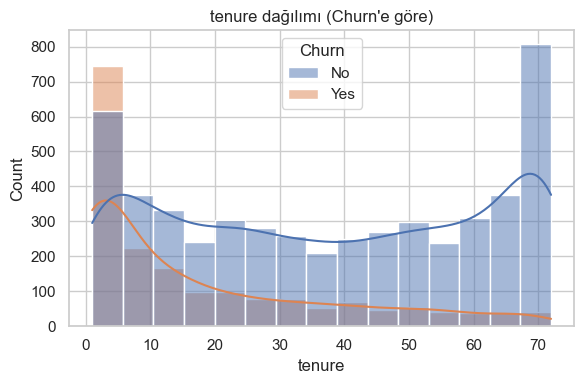

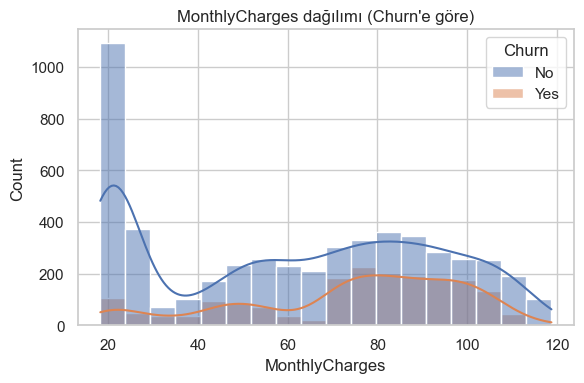

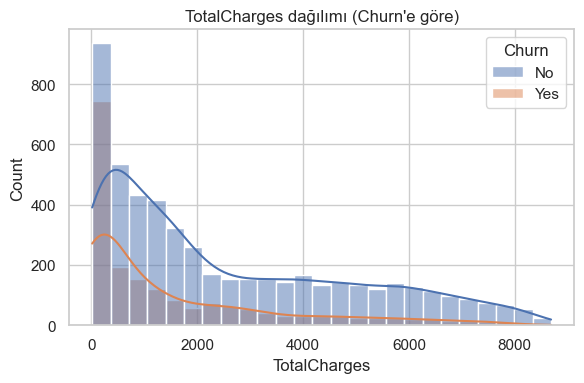

In [25]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(f"{col} dağılımı (Churn'e göre)")
    plt.tight_layout()
    plt.show()

<Figure size 1000x800 with 0 Axes>

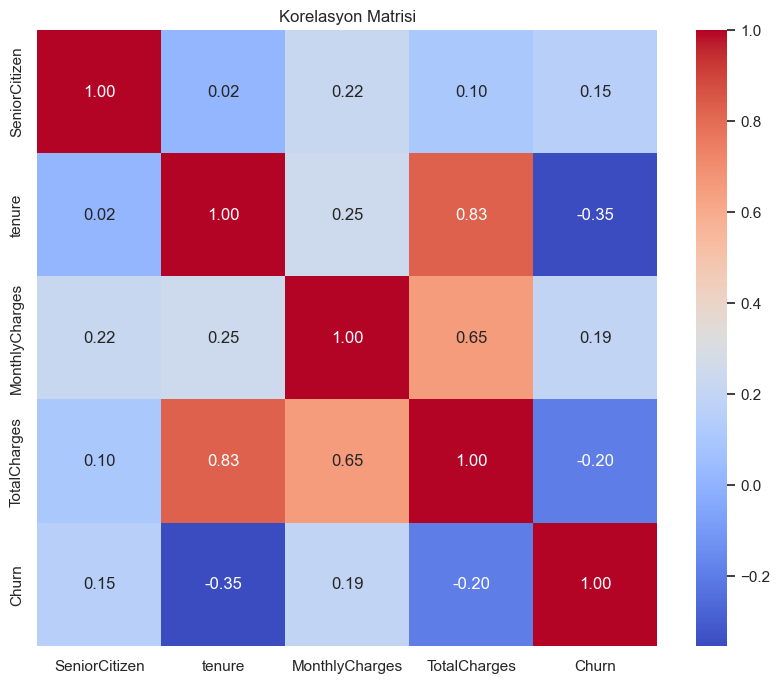

In [37]:
df_encoded = df.copy()
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(10,8))
df_numeric = df_encoded.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


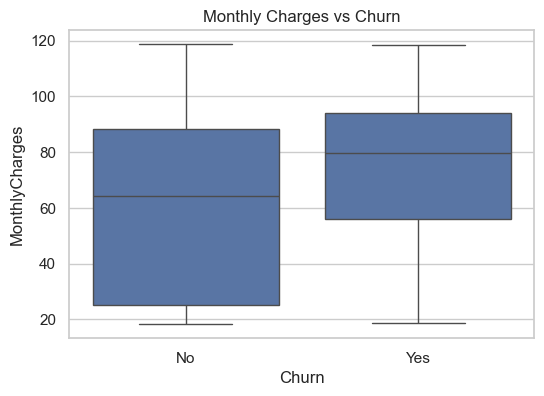

In [39]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

In [41]:
df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.650010,61.307408,2555.344141
Yes,17.979133,74.441332,1531.796094


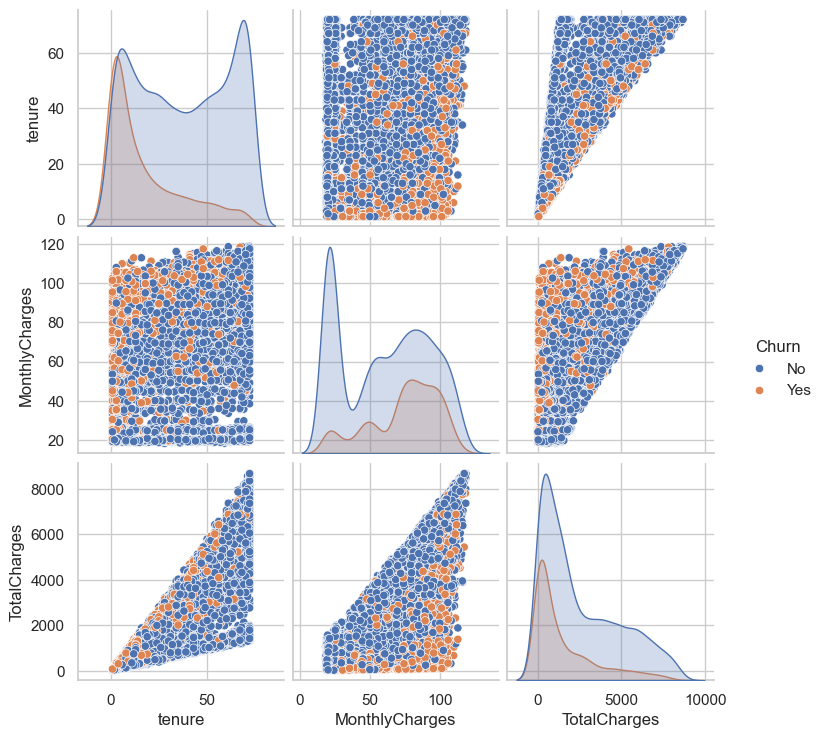

In [43]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')

In [ ]:
- "Fiber internet kullanan müşteriler daha fazla churn ediyor."
- "Aylık ödemesi yüksek olan müşteriler daha fazla churn ediyor."
- "2 yıldan uzun süredir müşteri olanlar daha az churn ediyor."
